In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [6]:
data=pd.read_csv('Cust_Spend_Data.csv')

In [10]:
data.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [8]:
data.isnull().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [11]:
dataattr=data.iloc[:,2:]
dataattr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [12]:
datascaled=dataattr.apply(zscore)

In [13]:
datascaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


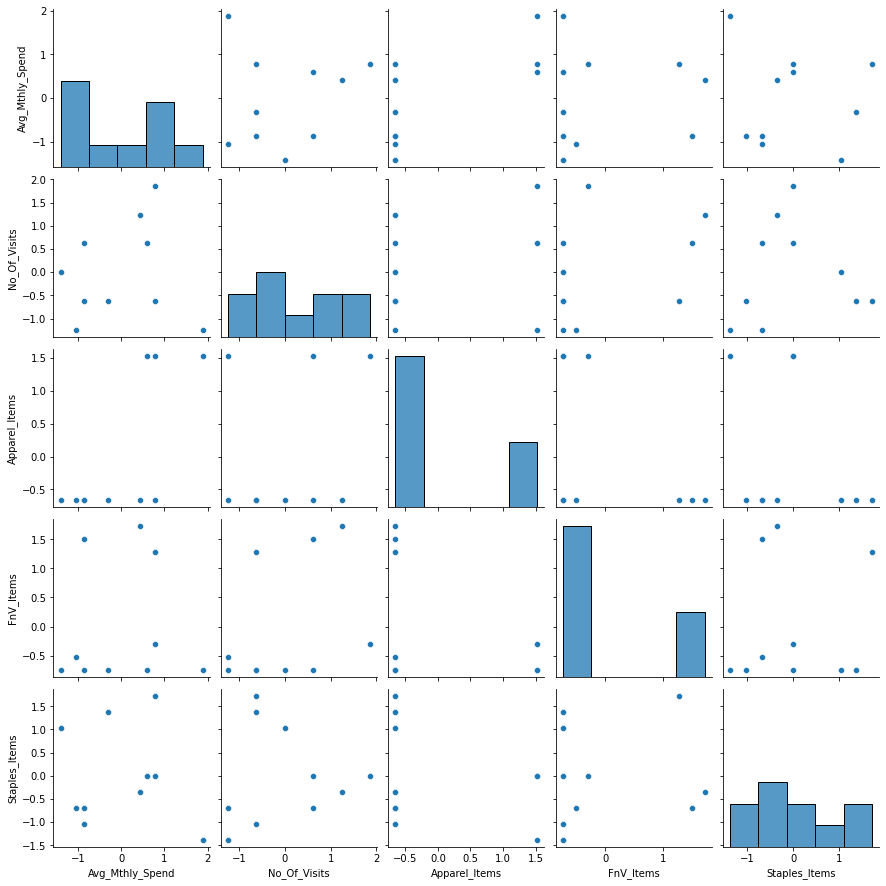

In [14]:
sns.pairplot(datascaled)

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [17]:
model.fit(datascaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [18]:
dataattr['labels']=model.labels_

In [19]:
dataattr.head(15)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [20]:
dataclust=dataattr.groupby(['labels'])

In [21]:
dataclust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [23]:
from scipy.spatial.distance import pdist

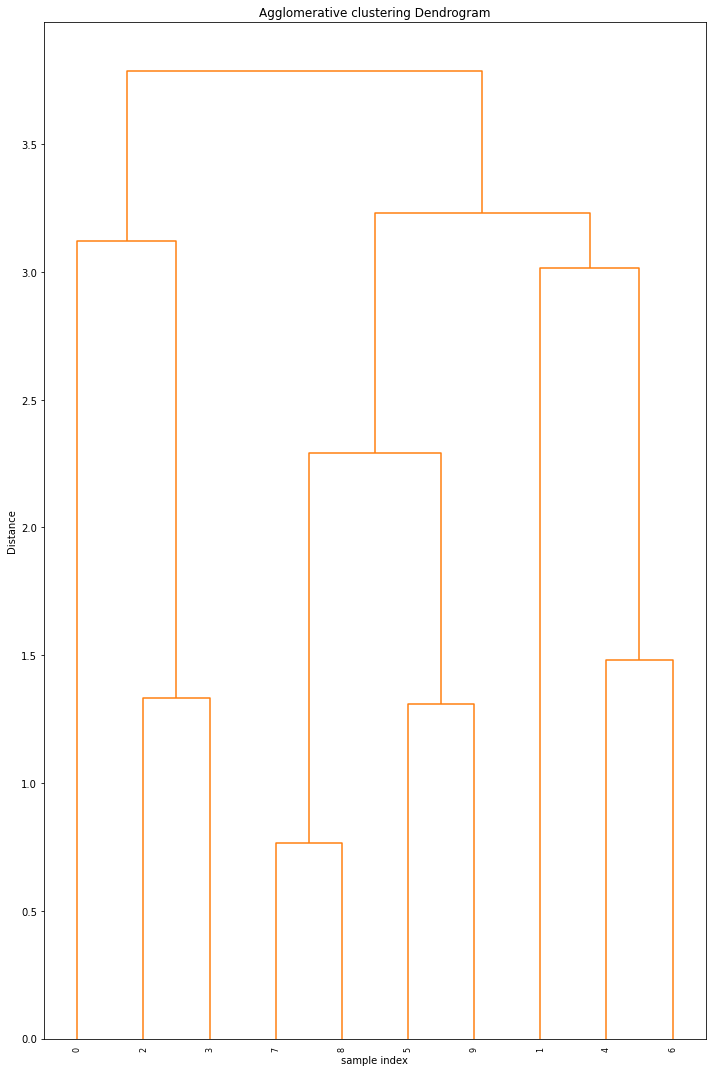

In [26]:
plt.figure(figsize=(10,15))
plt.title("Agglomerative clustering Dendrogram")
plt.xlabel('sample index')
plt.ylabel('Distance')
z=linkage(datascaled,metric='euclidean',method='average')
dendrogram(z,leaf_rotation=90.,color_threshold=40,leaf_font_size=8.)
plt.tight_layout()